In [ ]:
!nvidia-smi

Mon Aug 16 00:26:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
drug_train= pd.read_csv('drugsComTrain_raw.tsv',sep='\t')
drug_test= pd.read_csv('drugsComTest_raw.tsv',sep='\t')
print(drug_train.shape)
print(drug_test.shape)

(161297, 7)
(53766, 7)


In [ ]:
drug=pd.concat([drug_train, drug_test])
drug.head()

Unnamed: 0                  drugName  ...               date usefulCount
0      206461                 Valsartan  ...       May 20, 2012          27
1       95260                Guanfacine  ...     April 27, 2010         192
2       92703                    Lybrel  ...  December 14, 2009          17
3      138000                Ortho Evra  ...   November 3, 2015          10
4       35696  Buprenorphine / naloxone  ...  November 27, 2016          37

[5 rows x 7 columns]

In [ ]:
print(drug.shape)

(215063, 7)


In [ ]:
drug.to_csv('finaldrugs_data.csv')

In [ ]:
data = pd.read_csv('finaldrugs_data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    215063 non-null  int64  
 1   Unnamed: 0.1  215063 non-null  int64  
 2   drugName      215063 non-null  object 
 3   condition     213869 non-null  object 
 4   review        215063 non-null  object 
 5   rating        215063 non-null  float64
 6   date          215063 non-null  object 
 7   usefulCount   215063 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 13.1+ MB


In [ ]:
data.head()

Unnamed: 0  Unnamed: 0.1  ...               date usefulCount
0           0        206461  ...       May 20, 2012          27
1           1         95260  ...     April 27, 2010         192
2           2         92703  ...  December 14, 2009          17
3           3        138000  ...   November 3, 2015          10
4           4         35696  ...  November 27, 2016          37

[5 rows x 8 columns]

In [ ]:
data = data.drop('Unnamed: 0',axis=1)
data = data.drop('Unnamed: 0.1',axis=1)

In [ ]:
data.isnull().any()

drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 2.7 MB/s 


In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import re
import pickle
from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [ ]:
!pip install wordcloud

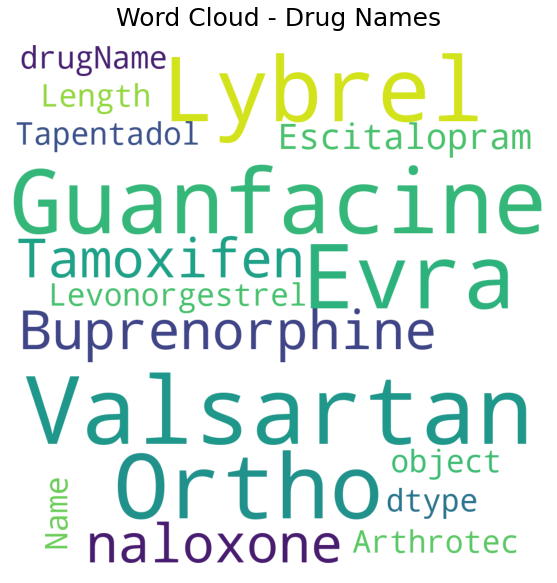

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1000, height = 1000).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

It seems the most popular drugs in the data are Levonirgestrel, Larcaserin, Guanfacine, Liraglutide, Pentasa, Buprenorphine and so on.

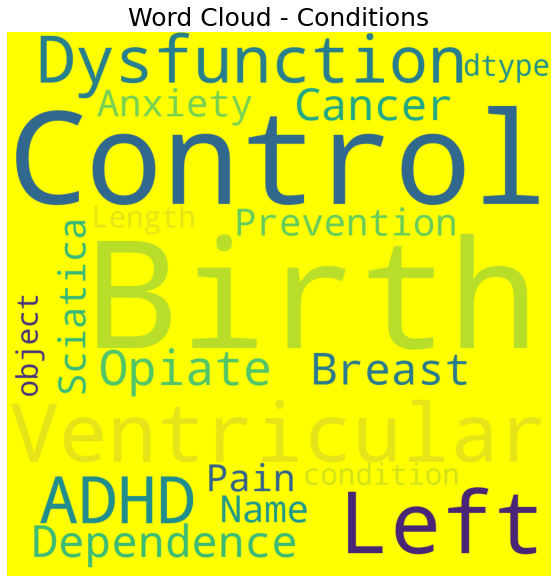

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'yellow', stopwords = stopwords, width = 1000, height = 1000).generate(str(data['condition']))

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Word Cloud - Conditions', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

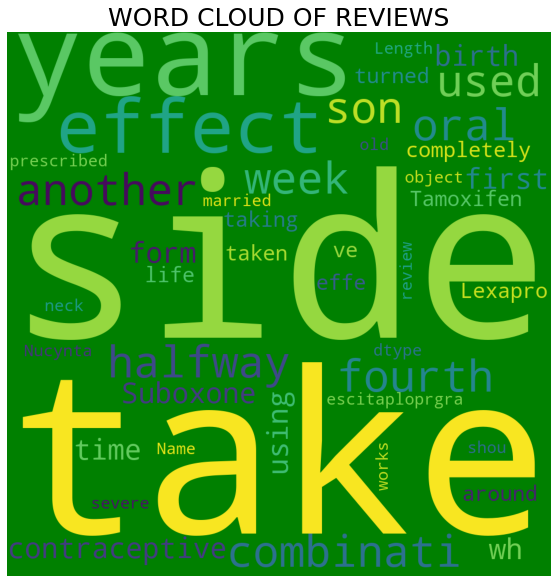

In [ ]:
wordcloud = WordCloud(background_color = 'green', stopwords = stopwords, width = 1000, height = 1000).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Top 20 drugs with rating = 10

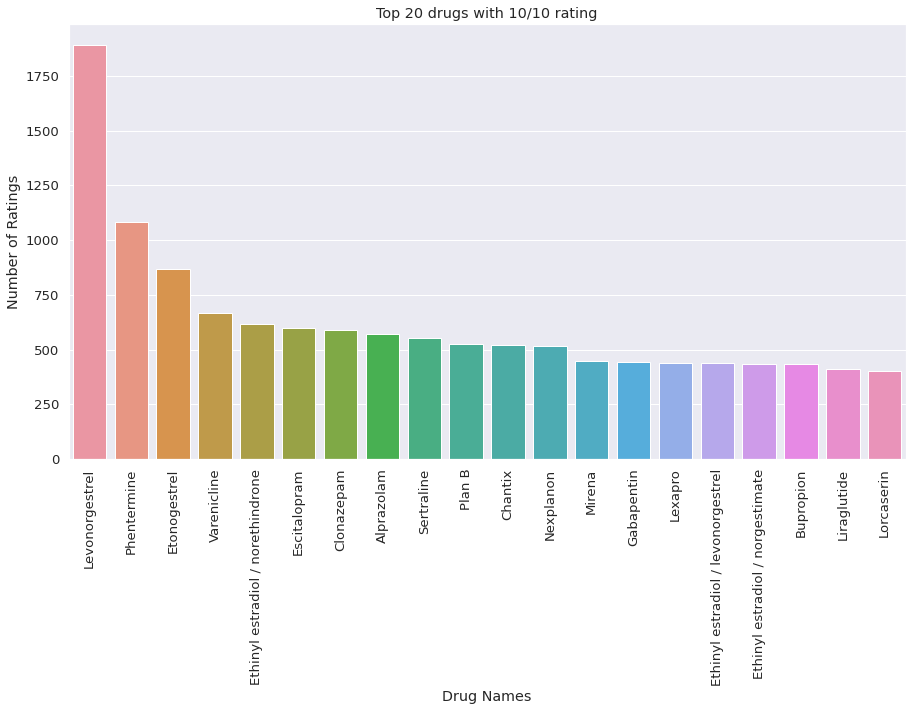

In [ ]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

# Top 20 drugs with rating = 1

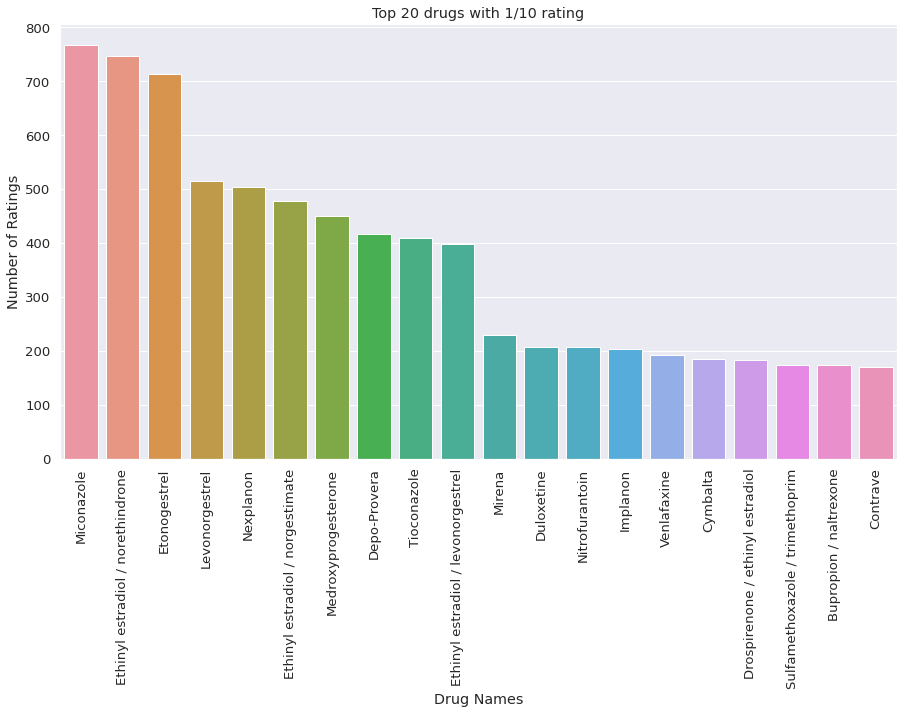

In [ ]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

In [ ]:
data.loc[(data['rating'] >= 5), 'Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Sentiment'] = 0

data['Sentiment'].value_counts()

1.0    161491
0.0     53572
Name: Sentiment, dtype: int64

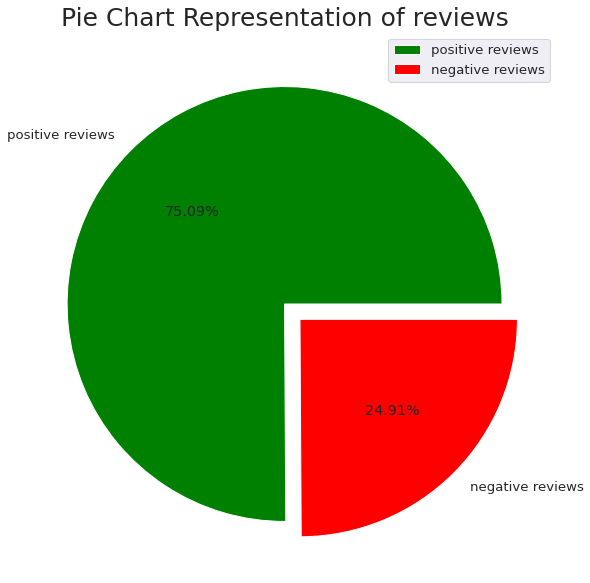

In [ ]:
size = [161491, 53572]
colors = ['green', 'red']
labels = "positive reviews","negative reviews"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of reviews', fontsize = 25)
plt.legend()
plt.show()

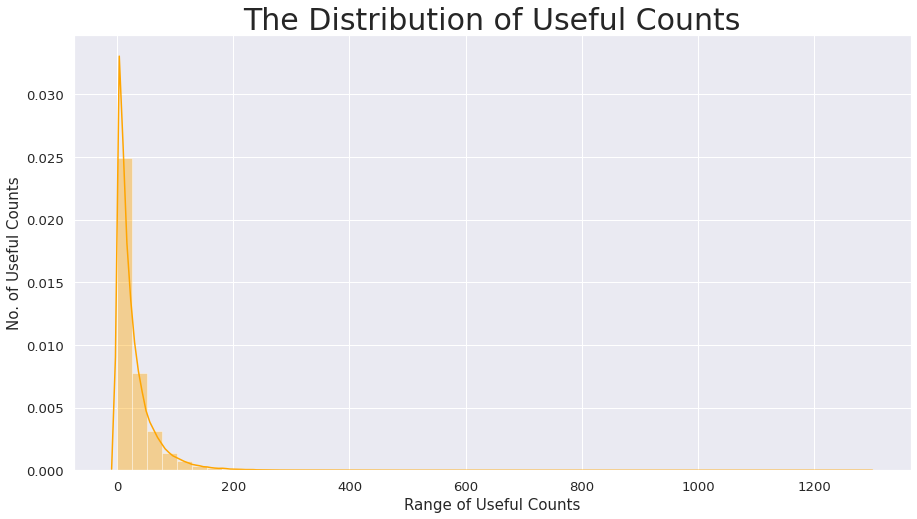

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(data['usefulCount'], color = 'orange')
plt.title('The Distribution of Useful Counts', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.show()

In [ ]:
data['review'][5]

'"2nd day on 5mg started to work with rock hard erections however experianced headache, lower bowel preassure. 3rd day erections would wake me up &amp; hurt! Leg/ankles aches   severe lower bowel preassure like you need to go #2 but can&#039;t! Enjoyed the initial rockhard erections but not at these side effects or $230 for months supply! I&#039;m 50 &amp; work out 3Xs a week. Not worth side effects!"'

# Cleaning the reviews

In [ ]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
def preprocess_text(text_data):
    preprocessed_text = []
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [ ]:
preprocessed_reviews = preprocess_text(data['review'].values)

100%|██████████| 215063/215063 [00:13<00:00, 15812.93it/s]


In [ ]:
preprocessed_reviews[5]

'2nd day 5mg started work rock hard erections experianced headache lower bowel preassure 3rd day erections wake amp hurt leg ankles aches severe lower bowel preassure need go 2 039 t enjoyed initial rockhard erections side effects 230 months supply 039 m 50 amp work 3xs week worth side effects'

In [ ]:
data['clean_review'] = preprocessed_reviews

In [ ]:
from nltk.stem import SnowballStemmer
Snow_ball = SnowballStemmer("english")
data['clean_review'] = data['clean_review'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   drugName      215063 non-null  object 
 1   condition     213869 non-null  object 
 2   review        215063 non-null  object 
 3   rating        215063 non-null  float64
 4   date          215063 non-null  object 
 5   usefulCount   215063 non-null  int64  
 6   Sentiment     215063 non-null  float64
 7   clean_review  215063 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 13.1+ MB


To impute null values in condition, there are 1,194 conditions are missing in the data. Therefore we replaced those missing values with highest repeated value i.e, Birth Control which itself repeated for 38,436.

In [ ]:
data['condition'].fillna('Birth Control',inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   drugName      215063 non-null  object 
 1   condition     215063 non-null  object 
 2   review        215063 non-null  object 
 3   rating        215063 non-null  float64
 4   date          215063 non-null  object 
 5   usefulCount   215063 non-null  int64  
 6   Sentiment     215063 non-null  float64
 7   clean_review  215063 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 13.1+ MB


# Binary Rating Model

### Making the Data model readyMaking the Data model ready

In [ ]:
y = data['Sentiment'].values
X = data.drop(['Sentiment'], axis=1)
X.head(3)

drugName  ...                                       clean_review
0   Valsartan  ...       side effect take combin bystol 5 mg fish oil
1  Guanfacine  ...  son halfway fourth week intuniv becam concern ...
2      Lybrel  ...  use take anoth oral contracept 21 pill cycl ha...

[3 rows x 7 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

# Encoding numerical values

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['usefulCount'].values.reshape(-1,1))

X_train_usecount_norm = normalizer.transform(X_train['usefulCount'].values.reshape(1,-1))
X_test_usecount_norm = normalizer.transform(X_test['usefulCount'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_usecount_norm.shape, y_train.shape)
print(X_test_usecount_norm.shape, y_test.shape)

After vectorizations
(1, 161297) (161297,)
(1, 53766) (53766,)


In [ ]:
X_train_usecount_norm = X_train_usecount_norm.reshape(-1,1)
X_test_usecount_norm = X_test_usecount_norm.reshape(-1,1)
print(X_train_usecount_norm.shape, y_train.shape)
print(X_test_usecount_norm.shape, y_test.shape)

(161297, 1) (161297,)
(53766, 1) (53766,)


# Encoding categorical values

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['drugName'].values)


X_train_name_ohe = vectorizer.transform(X_train['drugName'].values)
X_test_name_ohe = vectorizer.transform(X_test['drugName'].values)

print("After vectorizations")
print(X_train_name_ohe.shape, y_train.shape)
print(X_test_name_ohe.shape, y_test.shape)

After vectorizations
(161297, 3322) (161297,)
(53766, 3322) (53766,)


In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['condition'].values) 

X_train_condition_ohe = vectorizer.transform(X_train['condition'].values)
X_test_condition_ohe = vectorizer.transform(X_test['condition'].values)

print("After vectorizations")
print(X_train_condition_ohe.shape, y_train.shape)
print(X_test_condition_ohe.shape, y_test.shape)

After vectorizations
(161297, 1069) (161297,)
(53766, 1069) (53766,)


# TFidf Vectorizer of reviews¶

In [ ]:
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['clean_review'])

X_train_review_tfidf=vectorizer.transform(X_train['clean_review'].values)
X_test_review_tfidf=vectorizer.transform(X_test['clean_review'].values)

print("After vectorizations")
print(X_train_review_tfidf.shape, y_train.shape)
print(X_test_review_tfidf.shape, y_test.shape)

After vectorizations
(161297, 9571) (161297,)
(53766, 9571) (53766,)


# Concatinating all the features¶

In [ ]:
from scipy.sparse import csr_matrix
from scipy import sparse

In [ ]:
from scipy.sparse import hstack
X_tr_tf = hstack((X_train_name_ohe,X_train_condition_ohe,X_train_usecount_norm,X_train_review_tfidf)).tocsr()
X_te_tf = hstack((X_test_name_ohe,X_test_condition_ohe,X_test_usecount_norm,X_test_review_tfidf)).tocsr()

print("Final Data matrix")
print(X_tr_tf.shape,y_train.shape)
print(X_te_tf.shape,y_test.shape)

Final Data matrix
(161297, 13963) (161297,)
(53766, 13963) (53766,)


In [ ]:
from sklearn.linear_model import LogisticRegression
model_logistic_regression_classifier = LogisticRegression(random_state=10)

# Fit the model on training data
model_logistic_regression_classifier.fit(X_tr_tf,y_train)

#Get predicted values on test data
logistic_regression_predictions = model_logistic_regression_classifier.predict(X_te_tf)

#Print precision recall matrix and Accuracy obtained by above model
print(classification_report(y_test,logistic_regression_predictions))
logistic_regression_accuracy = accuracy_score(y_test,logistic_regression_predictions)
print(logistic_regression_accuracy)

              precision    recall  f1-score   support

         0.0       0.76      0.60      0.67     13393
         1.0       0.87      0.94      0.91     40373

    accuracy                           0.85     53766
   macro avg       0.82      0.77      0.79     53766
weighted avg       0.85      0.85      0.85     53766

0.8529182010936279


## AUC 

In [1]:
def pred_prob(clf, data): 
    y_pred = []
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

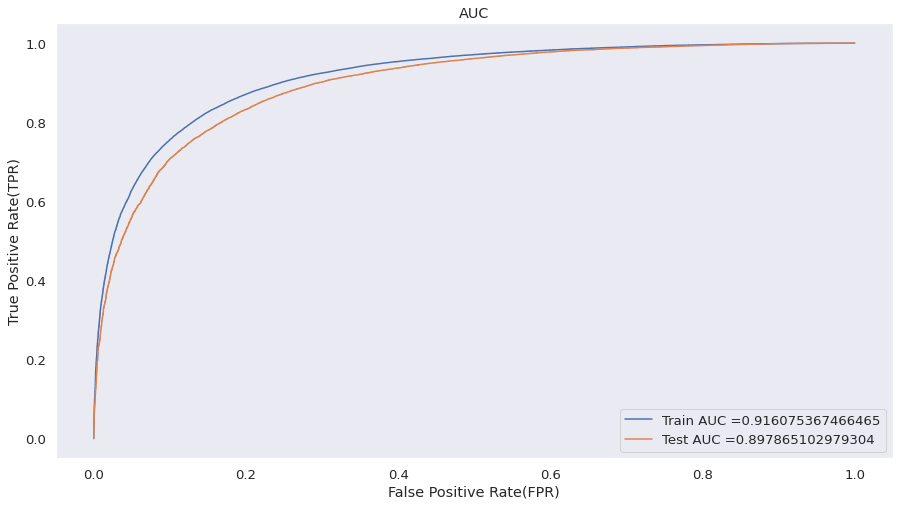

In [ ]:
y_tr_predict=pred_prob(model_logistic_regression_classifier,X_tr_tf)   
y_te_predict=pred_prob(model_logistic_regression_classifier,X_te_tf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_tr_predict)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_te_predict)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## Confusion Matrix

In [ ]:
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    global predicted_values
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    predicted_values=predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.7025642948148849 for threshold 0.743


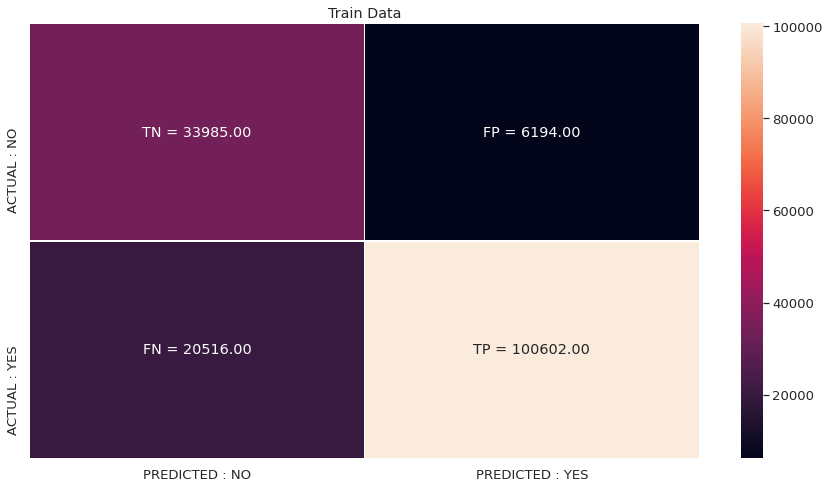

the maximum value of tpr*(1-fpr) 0.667553159818368 for threshold 0.74


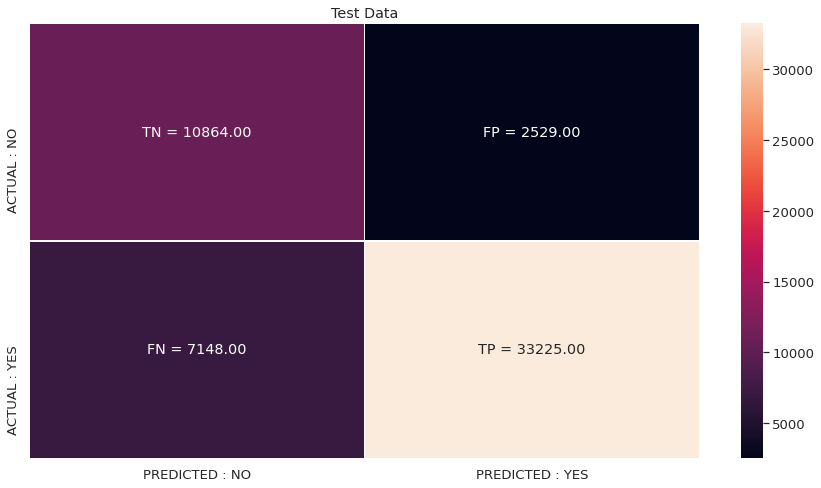

In [ ]:
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig = plt.figure()
ax = fig.add_subplot(111)
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm = confusion_matrix(y_train, predict_with_best_t(y_tr_predict, best_t))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), cm.flatten())])).reshape(2,2)
sns.heatmap(cm,linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '')
ax.set_title('Train Data')
plt.show(ax)

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig = plt.figure()
ax1 = fig.add_subplot(111)
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
cm = confusion_matrix(y_test, predict_with_best_t(y_te_predict, best_t))
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), cm.flatten())])).reshape(2,2)
sns.heatmap(cm, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '')
ax1.set_title('Test Data')
plt.show(ax1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_decision_tree_classifier = DecisionTreeClassifier(criterion='gini',random_state=10,max_depth=1000,max_features=10000)

# Fit the model on training data
model_decision_tree_classifier.fit(X_tr_tf,y_train)

#Get predicted values on test data
decision_tree_predictions = model_decision_tree_classifier.predict(X_te_tf)

#Print precision recall matrix and Accuracy obtained by above model
print(classification_report(y_test,decision_tree_predictions))
decision_tree_accuracy = accuracy_score(y_test,decision_tree_predictions)
print(decision_tree_accuracy)

              precision    recall  f1-score   support

         0.0       0.69      0.60      0.65     13393
         1.0       0.87      0.91      0.89     40373

    accuracy                           0.84     53766
   macro avg       0.78      0.76      0.77     53766
weighted avg       0.83      0.84      0.83     53766

0.8351374474575011


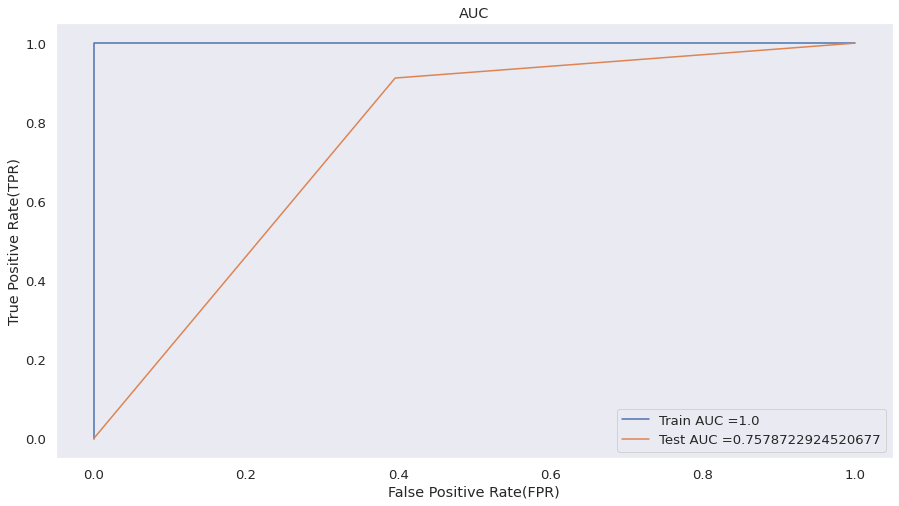

In [ ]:
y_tr_predict=pred_prob(model_decision_tree_classifier,X_tr_tf)   
y_te_predict=pred_prob(model_decision_tree_classifier,X_te_tf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_tr_predict)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_te_predict)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 1.0 for threshold 1.0


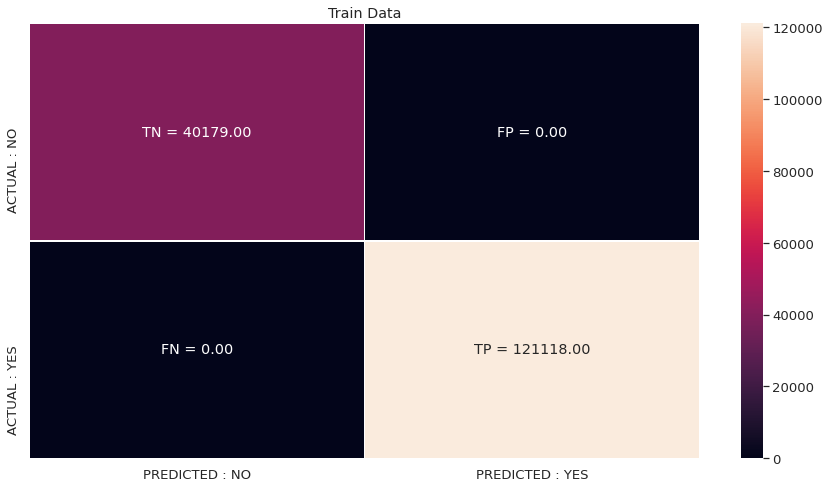

the maximum value of tpr*(1-fpr) 0.5506621929481675 for threshold 1.0


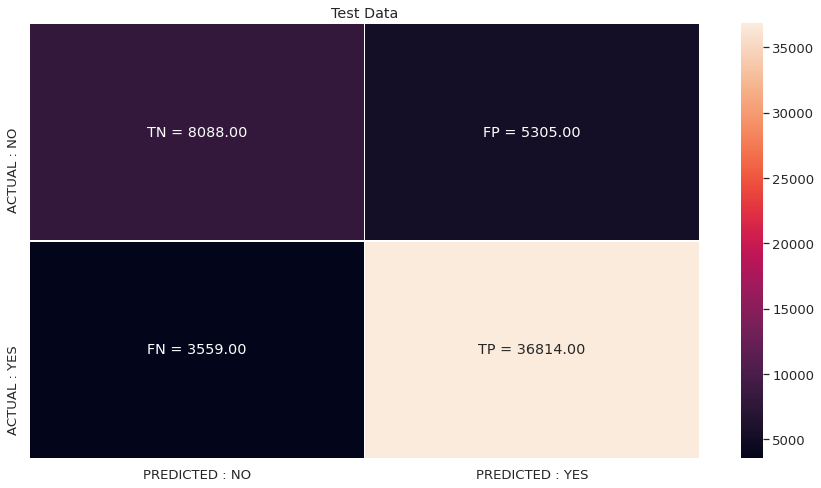

In [ ]:
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig = plt.figure()
ax = fig.add_subplot(111)
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm = confusion_matrix(y_train, predict_with_best_t(y_tr_predict, best_t))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), cm.flatten())])).reshape(2,2)
sns.heatmap(cm,linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '')
ax.set_title('Train Data')
plt.show(ax)

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig = plt.figure()
ax1 = fig.add_subplot(111)
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
cm = confusion_matrix(y_test, predict_with_best_t(y_te_predict, best_t))
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), cm.flatten())])).reshape(2,2)
sns.heatmap(cm, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '')
ax1.set_title('Test Data')
plt.show(ax1)

In [ ]:
from xgboost import XGBClassifier
GBDT =XGBClassifier()
GBDT.fit(X_tr_tf,y_train)
GradientBoost_decision_tree_predictions = GBDT.predict(X_te_tf)

#Print precision recall matrix and Accuracy obtained by above model
print(classification_report(y_test,GradientBoost_decision_tree_predictions))
GradientBoost_decision_tree_accuracy = accuracy_score(y_test,GradientBoost_decision_tree_predictions)
print(GradientBoost_decision_tree_accuracy)

              precision    recall  f1-score   support

         0.0       0.81      0.18      0.30     13393
         1.0       0.78      0.99      0.87     40373

    accuracy                           0.79     53766
   macro avg       0.80      0.58      0.59     53766
weighted avg       0.79      0.79      0.73     53766

0.7862031767287877


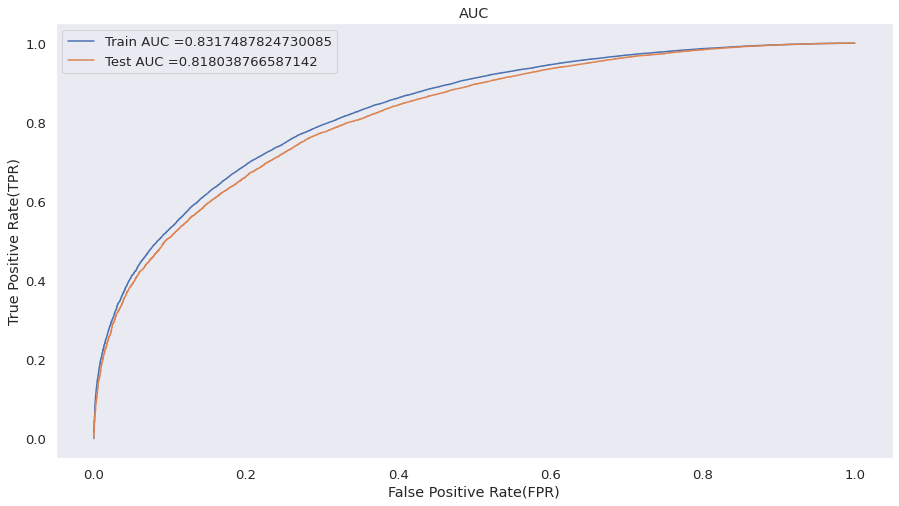

In [ ]:
y_tr_predict=pred_prob(GBDT,X_tr_tf)   
y_te_predict=pred_prob(GBDT,X_te_tf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_tr_predict)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_te_predict)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.5612163341549415 for threshold 0.719


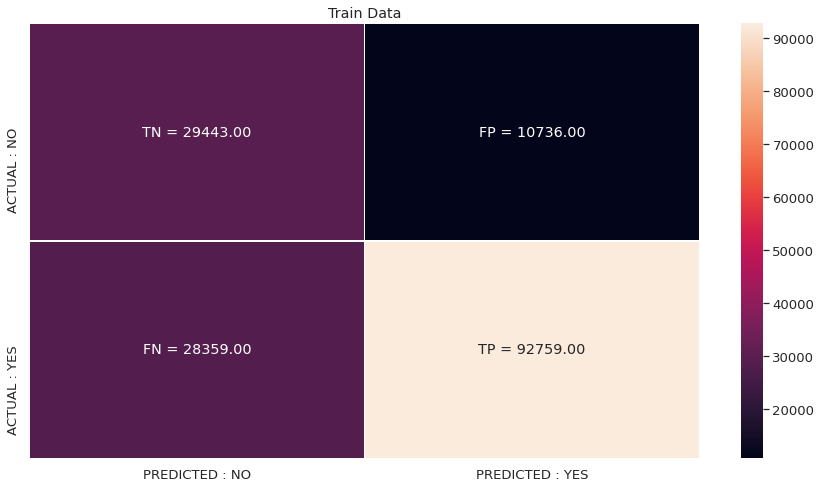

the maximum value of tpr*(1-fpr) 0.54529458369287 for threshold 0.757


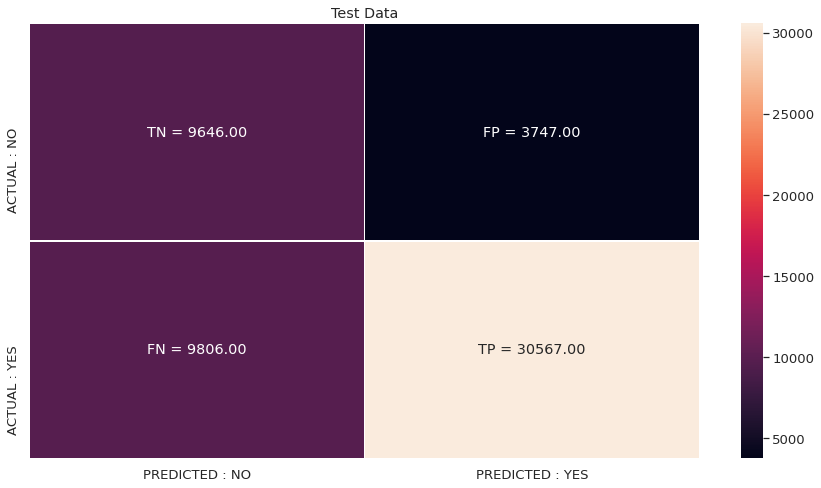

In [ ]:
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig = plt.figure()
ax = fig.add_subplot(111)
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm = confusion_matrix(y_train, predict_with_best_t(y_tr_predict, best_t))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), cm.flatten())])).reshape(2,2)
sns.heatmap(cm,linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '')
ax.set_title('Train Data')
plt.show(ax)

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig = plt.figure()
ax1 = fig.add_subplot(111)
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
cm = confusion_matrix(y_test, predict_with_best_t(y_te_predict, best_t))
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), cm.flatten())])).reshape(2,2)
sns.heatmap(cm, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '')
ax1.set_title('Test Data')
plt.show(ax1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_tr_tf, y_train)
knn_predictions = knn.predict(X_te_tf)

#Print precision recall matrix and Accuracy obtained by above model
print(classification_report(y_test,knn_predictions))
knn_accuracy = accuracy_score(y_test,knn_predictions)

              precision    recall  f1-score   support

         0.0       0.60      0.29      0.39     13393
         1.0       0.80      0.94      0.86     40373

    accuracy                           0.77     53766
   macro avg       0.70      0.61      0.63     53766
weighted avg       0.75      0.77      0.74     53766



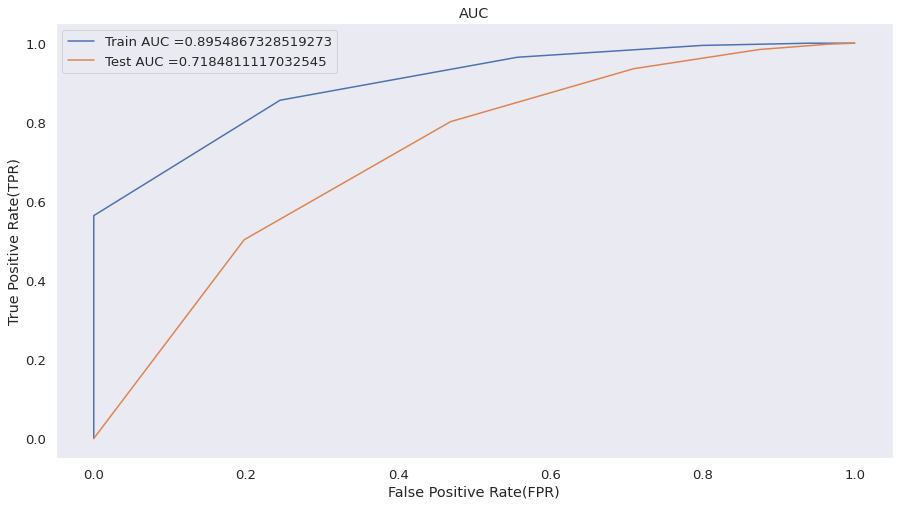

In [ ]:
y_tr_predict=pred_prob(knn,X_tr_tf)   
y_te_predict=pred_prob(knn,X_te_tf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_tr_predict)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_te_predict)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.6461927059354944 for threshold 0.8


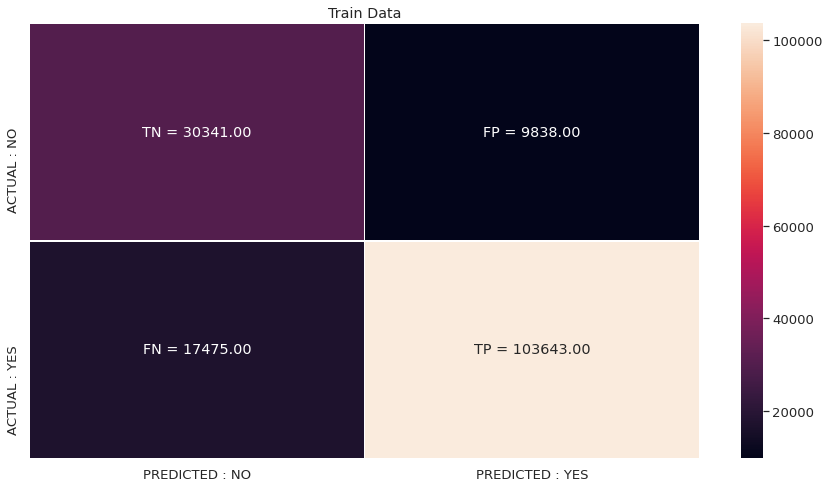

the maximum value of tpr*(1-fpr) 0.42564230934351704 for threshold 0.8


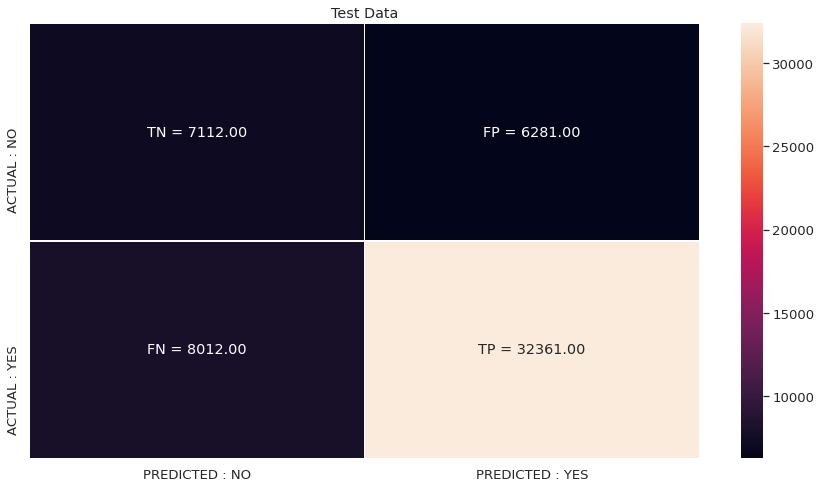

In [ ]:
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig = plt.figure()
ax = fig.add_subplot(111)
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm = confusion_matrix(y_train, predict_with_best_t(y_tr_predict, best_t))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), cm.flatten())])).reshape(2,2)
sns.heatmap(cm,linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '')
ax.set_title('Train Data')
plt.show(ax)

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig = plt.figure()
ax1 = fig.add_subplot(111)
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
cm = confusion_matrix(y_test, predict_with_best_t(y_te_predict, best_t))
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), cm.flatten())])).reshape(2,2)
sns.heatmap(cm, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '')
ax1.set_title('Test Data')
plt.show(ax1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_random_forst_classifier = RandomForestClassifier(random_state=10)

model_random_forst_classifier.fit(X_tr_tf,y_train)

#Get predicted values on test data
random_forest_predictions = model_random_forst_classifier.predict(X_te_tf)

#Print precision recall matrix and Accuracy obtained by above model
print(classification_report(y_test,random_forest_predictions))
decision_tree_accuracy = accuracy_score(y_test,random_forest_predictions)

              precision    recall  f1-score   support

         0.0       0.97      0.68      0.80     13393
         1.0       0.90      0.99      0.95     40373

    accuracy                           0.91     53766
   macro avg       0.94      0.83      0.87     53766
weighted avg       0.92      0.91      0.91     53766



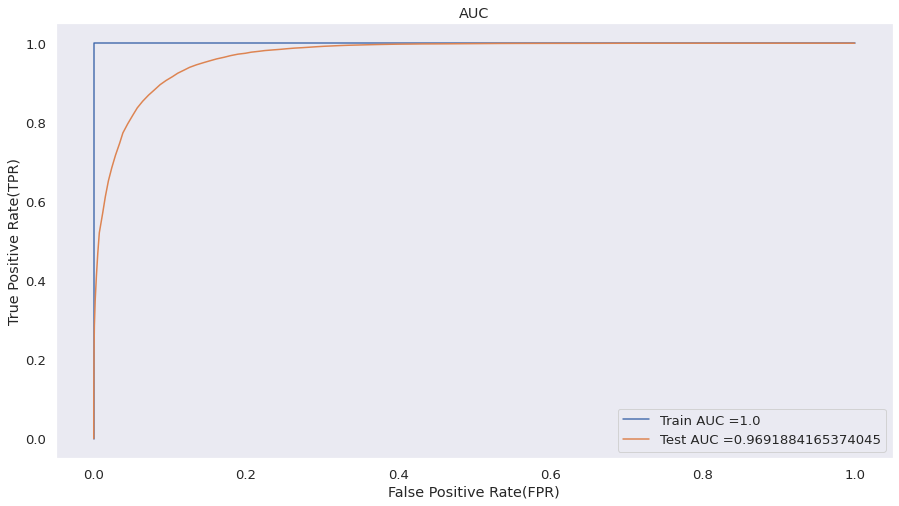

In [ ]:
y_tr_predict=pred_prob(model_random_forst_classifier,X_tr_tf)   
y_te_predict=pred_prob(model_random_forst_classifier,X_te_tf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_tr_predict)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_te_predict)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 1.0 for threshold 0.61


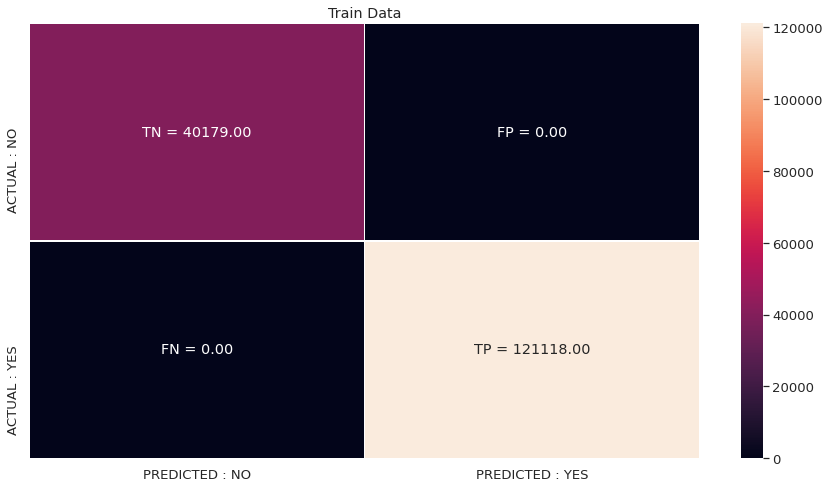

the maximum value of tpr*(1-fpr) 0.8220606156779401 for threshold 0.74


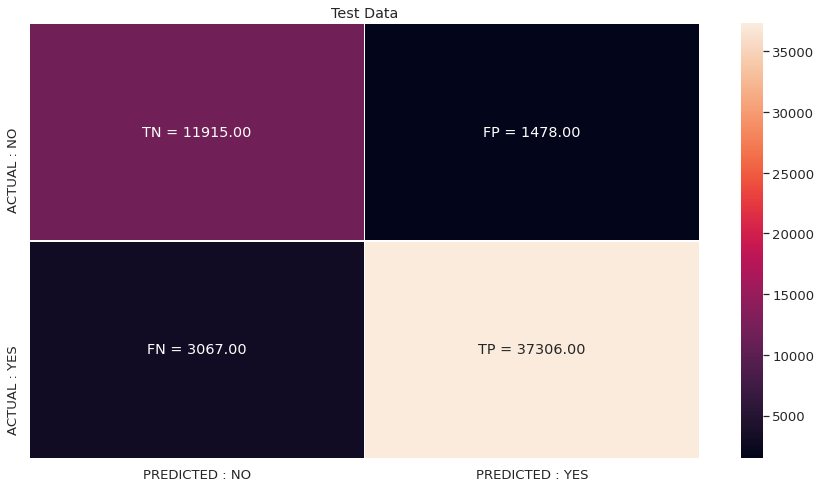

In [ ]:
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig = plt.figure()
ax = fig.add_subplot(111)
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm = confusion_matrix(y_train, predict_with_best_t(y_tr_predict, best_t))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), cm.flatten())])).reshape(2,2)
sns.heatmap(cm,linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '')
ax.set_title('Train Data')
plt.show(ax)

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig = plt.figure()
ax1 = fig.add_subplot(111)
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
cm = confusion_matrix(y_test, predict_with_best_t(y_te_predict, best_t))
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), cm.flatten())])).reshape(2,2)
sns.heatmap(cm, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '')
ax1.set_title('Test Data')
plt.show(ax1)

In [2]:
!pip install prettytable

In [3]:
from prettytable import PrettyTable


x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Train-AUC", "Test-AUC"]

x.add_row(["TFIDF", "Logistic_Regression", 0.9160,0.8978])
x.add_row(["TFIDF", "Decision_Tree", 1.0,0.7578])
x.add_row(["TFIDF", "GBDT-(Gradient_Boosted_Decision_Tree)", 0.8317,0.8180])
x.add_row(["TFIDF", "KNN-(K-Nearest_Neighbour", 0.8954,0.7184])
x.add_row(["TFIDF", "Random_Forest", 1.0,0.9691])
print(x)

+------------+---------------------------------------+-----------+----------+
| Vectorizer |                 Model                 | Train-AUC | Test-AUC |
+------------+---------------------------------------+-----------+----------+
|   TFIDF    |          Logistic_Regression          |   0.916   |  0.8978  |
|   TFIDF    |             Decision_Tree             |    1.0    |  0.7578  |
|   TFIDF    | GBDT-(Gradient_Boosted_Decision_Tree) |   0.8317  |  0.818   |
|   TFIDF    |        KNN-(K-Nearest_Neighbour       |   0.8954  |  0.7184  |
|   TFIDF    |             Random_Forest             |    1.0    |  0.9691  |
+------------+---------------------------------------+-----------+----------+
